## Check that tree and exact method work

In [1]:
import call_tree
import numpy as np
import matplotlib.pyplot as plt

#
# Check if the algorithm works properly
#

n = 100
anglemax = 0.4

t_tree1, T_exact1, eta1, N_int1, pos, f = call_tree.main(n, anglemax, 1, 1, show = True, exact = True)


 Starting N^2 gravity of 100 particles: 

Done in 0.11326885223388672 seconds

Starting tree gravity of 100 particles with theta = 0.4 : 

Done in 0.42569804191589355 seconds

Number of nodes:  [68. 70. 80. 63. 82. 80. 76. 71. 77. 65. 81. 77. 65. 81. 90. 72. 73. 75.
 66. 66. 69. 75. 60. 87. 77. 74. 83. 65. 63. 79. 83. 63. 89. 81. 65. 71.
 75. 92. 77. 81. 72. 78. 78. 90. 78. 81. 85. 72. 74. 81. 80. 92. 73. 84.
 69. 77. 71. 77. 80. 73. 70. 89. 69. 90. 73. 64. 71. 61. 84. 63. 76. 84.
 85. 66. 85. 67. 73. 76. 81. 92. 77. 78. 77. 81. 93. 66. 82. 88. 69. 67.
 85. 57. 63. 63. 81. 71. 84. 73. 79. 60.]

 Mean number of interactions:  75.65  +-  8.478649656637547
f_approx - f_exact: 
 [ 1.98173108e-05  1.80337198e-05 -2.85528438e-07  4.89973773e-05
  8.22560013e-06 -2.76647658e-05 -1.02313453e-05 -2.84066366e-06
  3.86558757e-05 -5.92884369e-05  7.05255458e-05  6.02230521e-06
  8.82936130e-05  3.37668415e-06 -4.34835946e-05 -6.29970619e-05
  2.93991441e-05  3.88142537e-05  1.10801217e-05 -2.921

<Figure size 1200x700 with 1 Axes>

## Now perform simulation on a bigger sample

In [2]:
n = 3000
anglemax = 0.8

t_tree, T_exact, eta, N_int, pos, f = call_tree.main(n, anglemax, 1, 1, exact = True)


 Starting N^2 gravity of 3000 particles: 

Done in 90.91667699813843 seconds

Starting tree gravity of 3000 particles with theta = 0.8 : 

Done in 10.74794316291809 seconds


 Mean number of interactions:  118.40933333333334  +-  33.6066428883074

 Mean error with tree algorithm:  0.015892224551997278  +-  0.013443912064161484

 -------------------------------------------------------


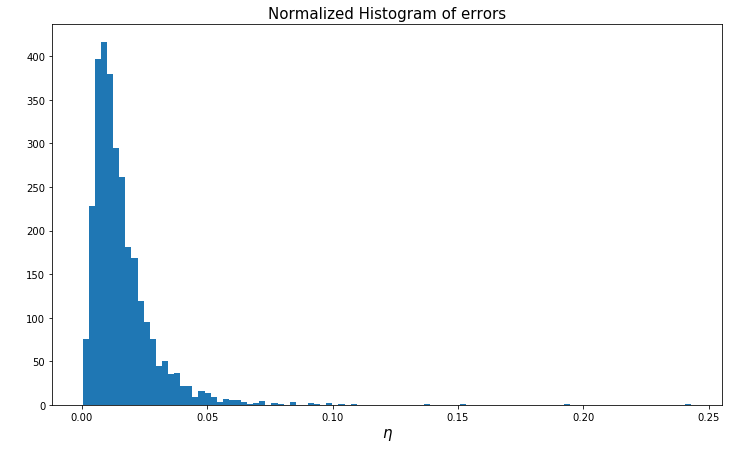

In [3]:
plt.figure(figsize=[12,7])
histo, bins, pathches = plt.hist(eta, 100, density = False)
plt.xlabel('$\eta$', fontsize = 15)
plt.ylabel(' ', fontsize = 15)
plt.title('Normalized Histogram of errors', fontsize = 15)
#plt.xlim(50,2500)
#plt.ylim(0,50)
plt.show()

The distribution of $\eta$ is very wide, we will need to take care of outliers later by limiting our sample of $\eta$ to within $2\sigma$ from the mean.

## Now perform the simulation on a grid of values


In [4]:
# Grid of parameters
n = [5000, 10000, 20000]
theta = [0.2, 0.4, 0.8]

# Vectors that will contain relevant quantities
t_tree = np.zeros((len(n), len(theta)))
t_exact = np.zeros((len(n), len(theta)))
eta = np.zeros((len(n), len(theta), 2))
N_int = np.zeros((len(n), len(theta), 2))

for i in range(len(n)):
    #
    # perform exact calculation only once for a given N
    #
    t_tree[i,0], t_exact[i,:], eta_temp, N_int_temp, particles_pos, force_exact = call_tree.main(n[i], theta[0], 1, 1, exact = True)
    #
    # take only values of eta in an acceptable range
    #
    eta_temp = eta_temp[eta_temp < (np.mean(eta_temp) + 2*np.std(eta_temp))]
    eta[i,0,:] = [np.mean(eta_temp), np.std(eta_temp)]
    N_int[i,0,:] = [np.mean(N_int_temp), np.std(N_int_temp)]
    
    for j in range(1,len(n)):
        #
        # perform only tree algorithm for different angles
        #
        t_tree[i,j], eta_temp, N_int_temp = call_tree.main(n[i], theta[j], particles_pos, force_exact)
        eta_temp = eta_temp[eta_temp < (np.mean(eta_temp) + 2*np.std(eta_temp))]
        eta[i,j,:] = [np.mean(eta_temp), np.std(eta_temp)]
        N_int[i,j,:] = [np.mean(N_int_temp), np.std(N_int_temp)]


 Starting N^2 gravity of 5000 particles: 

Done in 219.50215911865234 seconds

Starting tree gravity of 5000 particles with theta = 0.2 : 

Done in 386.0918369293213 seconds


 Mean number of interactions:  1879.5594  +-  400.5073832922934

 Mean error with tree algorithm:  0.0003914883689247208  +-  0.00030014883326804384

 -------------------------------------------------------
Starting tree gravity of 5000 particles with theta = 0.4 : 

Done in 98.90308713912964 seconds


 Mean number of interactions:  576.8064  +-  147.9305435636603

 Mean error with tree algorithm:  0.002160879933617391  +-  0.00176885341044216

 -------------------------------------------------------
Starting tree gravity of 5000 particles with theta = 0.8 : 

Done in 24.248167991638184 seconds


 Mean number of interactions:  133.8958  +-  34.92457218578346

 Mean error with tree algorithm:  0.009133046392131144  +-  0.010176033293580612

 -------------------------------------------------------

 Starting N^2 g

In [9]:
#
# Show results
#

# Grid of parameters
n = [5000, 10000, 20000]
theta = [0.2, 0.4, 0.8]

from tabulate import tabulate

results_time_exact = [(n[i], t_exact[i,0]) for i in [0,1,2]]
print('\n Time used by exact algorithm: \n')
print(tabulate(results_time_exact, headers=["N", "T_exact"]))

print('\n Time used by tree algorithm: \n')
print(tabulate({"N": np.array(n).reshape(-1,1), "theta = 0.2": t_tree[:,0], "theta = 0.4": t_tree[:,1], "theta = 0.8": t_tree[:,2] }, headers="keys"))

print('\n Mean error made by tree algorithm: \n')
print(tabulate({"N": np.array(n).reshape(-1,1), "theta = 0.2": eta[:,0,0], "theta = 0.4": eta[:,1,0], "theta = 0.8": eta[:,2,0] }, headers="keys"))

print('\n Mean number of interactions made by tree algorithm: \n')
print(tabulate({"N": np.array(n).reshape(-1,1), "theta = 0.2": N_int[:,0,0], "theta = 0.4": N_int[:,1,0], "theta = 0.8": N_int[:,2,0] }, headers="keys"))



 Time used by exact algorithm: 

    N    T_exact
-----  ---------
 5000    219.502
10000    961.901
20000   6051.37

 Time used by tree algorithm: 

    N    theta = 0.2    theta = 0.4    theta = 0.8
-----  -------------  -------------  -------------
 5000        386.092        98.9031        24.2482
10000        954.44        214.449         42.4319
20000       4963.06        521.817         95.5146

 Mean error made by tree algorithm: 

    N    theta = 0.2    theta = 0.4    theta = 0.8
-----  -------------  -------------  -------------
 5000    0.000352061     0.00194255     0.00775196
10000    0.000375255     0.00180113     0.00638847
20000    0.000354467     0.00178089     0.00603204

 Mean number of interactions made by tree algorithm: 

    N    theta = 0.2    theta = 0.4    theta = 0.8
-----  -------------  -------------  -------------
 5000        1879.56        576.806        133.896
10000        2598.74        704.559        152.601
20000        3446.48        844.352     

Here we see the results of the algorithm calculations: the time of calculation and also the mean number of interactions increase decreasing $\theta$ and of course increasing the number of particles; moreover, with fewer particles the tree algorithm with $\theta = 0.2$ takes actually more or the same time as the full calculation. Of course also the error is best with small angles and a higher number of particles and also the mean number of interactions. Weighting computational cost and precision probabily Tree with $\theta = 0.4$ is the best choice.


 Tree algorithm computational time (theta = 0.2) =  [0.030763] * Nlog(N) +  -1311.0268099812006

 Tree algorithm computational time (theta = 0.4)=  [0.00274853] * Nlog(N) +  -26.476475433035944

 Tree algorithm computational time (theta = 0.8) =  [0.00046508] * Nlog(N) +  2.4781392761015937

 Exact algorithm computational time =  [1.59554286e-05] * N^2 +  -381.27605978647944


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


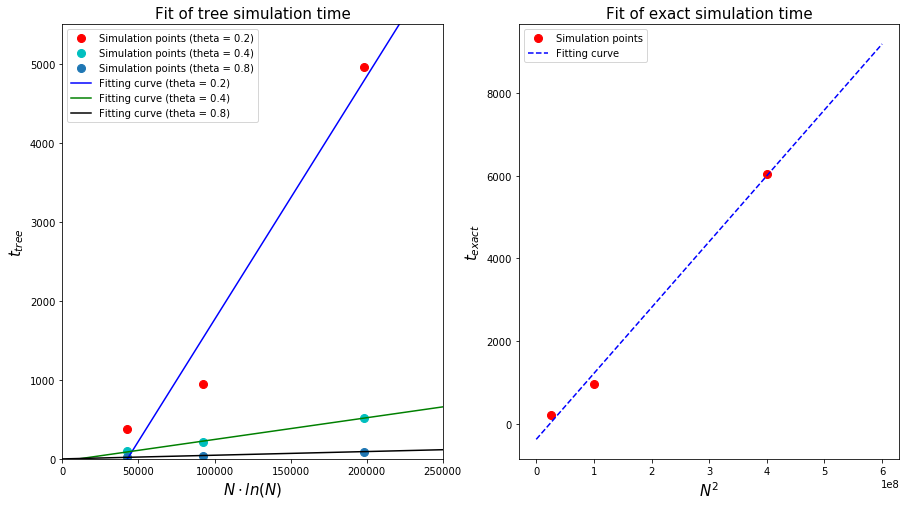

In [11]:
#
# Now fit calculation time 
#

from sklearn.linear_model import LinearRegression

# First with tree algorithm

n = np.array(n).reshape(-1,1)

n_tree = n*np.log(n)   # make logarithm of number of particles
reg_tree_1 = LinearRegression().fit(n_tree, t_tree[:,0])

print('\n Tree algorithm computational time (theta = 0.2) = ', reg_tree_1.coef_,'* Nlog(N) + ', reg_tree_1.intercept_)

reg_tree_2 = LinearRegression().fit(n_tree, t_tree[:,1])

print('\n Tree algorithm computational time (theta = 0.4)= ', reg_tree_2.coef_,'* Nlog(N) + ', reg_tree_2.intercept_)

reg_tree_3 = LinearRegression().fit(n_tree, t_tree[:,2])

print('\n Tree algorithm computational time (theta = 0.8) = ', reg_tree_3.coef_,'* Nlog(N) + ', reg_tree_3.intercept_)


n_exact = n**2   # make logarithm of number of particles
reg_exact = LinearRegression().fit(n_exact, t_exact[:,0])

print('\n Exact algorithm computational time = ', reg_exact.coef_,'* N^2 + ', reg_exact.intercept_)

#
# Plot results
#

fig2 = plt.subplots(figsize=[15,8])

x = np.arange(0, 6*10**8, 100).reshape(-1,1)

plt.subplot(1,2,1)
plt.plot(n_tree, t_tree[:,0], 'ro', label = 'Simulation points (theta = 0.2)', markersize = 8)
plt.plot(n_tree, t_tree[:,1], 'co', label = 'Simulation points (theta = 0.4)', markersize = 8)
plt.plot(n_tree, t_tree[:,2], 'o', label = 'Simulation points (theta = 0.8)', markersize = 8)
plt.plot(x, reg_tree_1.predict(x), '-b', label = 'Fitting curve (theta = 0.2)')
plt.plot(x, reg_tree_2.predict(x), '-g', label = 'Fitting curve (theta = 0.4)')
plt.plot(x, reg_tree_3.predict(x), '-k', label = 'Fitting curve (theta = 0.8)')
plt.title('Fit of tree simulation time', fontsize = 15)
plt.xlabel('$N\cdot ln(N)$', fontsize = 15)
plt.ylabel('$t_{tree}$', fontsize = 15)
plt.xlim(0, 250000)
plt.ylim(0,5500)
plt.legend()

plt.subplot(1,2,2)
plt.plot(n_exact, t_exact[:,0], 'ro', label = 'Simulation points', markersize = 8)
plt.plot(x, reg_exact.predict(x), '--b', label = 'Fitting curve')
plt.title('Fit of exact simulation time', fontsize = 15)
plt.xlabel('$N^2$', fontsize = 15)
plt.ylabel('$t_{exact}$', fontsize = 15)
plt.legend()

plt.show(fig2)

Apart from data with $\theta = 0.2$, every other set of data follows the predicted behaviour. We can also estimate the time needed by the various algorithm to perform a simulation of $10^{10}$ particles:

In [14]:
N_pred = np.array(10**10).reshape(1,-1)

print('Time needed by the exact algorithm: ', reg_exact.predict(N_pred**2), ' s , i.e. ', reg_exact.predict(N_pred**2)/(3600*24*365), ' years \n')
print('Time needed by the tree algorithm (theta = 0.2): ', reg_tree_1.predict(N_pred*np.log(N_pred)),  ' s , i.e. ', reg_tree_1.predict(N_pred*np.log(N_pred))/(3600*24*365), ' years \n')
print('Time needed by the tree algorithm (theta = 0.4): ', reg_tree_2.predict(N_pred*np.log(N_pred)),  ' s , i.e. ', reg_tree_2.predict(N_pred*np.log(N_pred))/(3600*24*365), ' years \n')
print('Time needed by the tree algorithm (theta = 0.8): ', reg_tree_3.predict(N_pred*np.log(N_pred)),  ' s , i.e. ', reg_tree_3.predict(N_pred*np.log(N_pred))/(3600*24*365), ' years \n')

Time needed by the exact algorithm:  [1.2391432e+14]  s , i.e.  [3929297.30746816]  years 

Time needed by the tree algorithm (theta = 0.2):  [7.0834419e+09]  s , i.e.  [224.61446924]  years 

Time needed by the tree algorithm (theta = 0.4):  [6.32872572e+08]  s , i.e.  [20.06825761]  years 

Time needed by the tree algorithm (theta = 0.8):  [1.07089045e+08]  s , i.e.  [3.39577136]  years 

